In [ ]:
# download file
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2022-01-11 02:33:07--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2022-01-11 02:33:08 (29.3 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]



In [ ]:
# install statsmodels
!pip install -U statsmodels

     |████████████████████████████████| 9.8 MB 5.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
# buat dataframe
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

# set freq jadi 'MS'
df.index.freq='MS'

# asumsikan bahwa forecast horizon adalah 12
h = 12

# buat variable untuk validasi sebanyak 10 step
steps = 10

# buat variable ntest
ntest = len(df) - h - steps + 1

# cek shape
df.shape

(144, 1)

In [ ]:
# konfigurasi hyperparameter
trend_type_list = ['add','mul']
seasonal_type_list = ['add','mul']
damped_trend_list = [True, False]
init_method_list = ['estimated','heuristic','legacy-heuristic']
use_boxcox_list = [True, False, 0]
# Catatan: jangan lupa kalo pake boxcox, 'log-nya' dibuat false

In [ ]:
# buat fungsi
def walkforward(trend_type,seasonal_type,damped_trend,init_method,use_boxcox,debug=False):

  # array error
  errors = []
  seen_last = False
  steps_completed = 0
  
  # buat perulangan
  for end_of_train in range(ntest, len(df) - h + 1):
    # kita tidak perlu add manual data kedalam dataset
    # kita hanya tinggal index saja di titik yang tepat -> ini cuma 'tampilan' bukan 'copyan'
    # sehingga tidak memakan memori
    train = df.iloc[:end_of_train]
    test = df.iloc[end_of_train:end_of_train + h]

    if test.index[-1] == df.index[-1]:
      seen_last = True

    steps_completed += 1

    hw = ExponentialSmoothing(train['Passengers'], initialization_method=init_method, trend=trend_type, damped_trend=damped_trend, seasonal=seasonal_type, seasonal_periods=12, use_boxcox=use_boxcox)
    res_hw = hw.fit()

    # Tampilkan error untuk forecast horizon
    fcast = res_hw.forecast(h)
    error = mean_squared_error(test['Passengers'], fcast)
    errors.append(error)
  
  if debug:
    print("seen last:", seen_last)
    print("steps completed:", steps_completed)
  
  return np.mean(errors)

In [ ]:
# Tes fungsi yang dibuat di atas
walkforward('add', 'add', False, 'legacy-heuristic', 0, debug=True)

seen last: True
steps completed: 10


2521.023839609926

In [ ]:
# Cari berdasarkan iterasi semua opsi yang memungkinkan (Ex: Grid Search)
tuple_of_option_lists = (trend_type_list, seasonal_type_list, damped_trend_list, init_method_list, use_boxcox_list)
for x in itertools.product(*tuple_of_option_lists):
  print(x)

('add', 'add', True, 'estimated', True)
('add', 'add', True, 'estimated', False)
('add', 'add', True, 'estimated', 0)
('add', 'add', True, 'heuristic', True)
('add', 'add', True, 'heuristic', False)
('add', 'add', True, 'heuristic', 0)
('add', 'add', True, 'legacy-heuristic', True)
('add', 'add', True, 'legacy-heuristic', False)
('add', 'add', True, 'legacy-heuristic', 0)
('add', 'add', False, 'estimated', True)
('add', 'add', False, 'estimated', False)
('add', 'add', False, 'estimated', 0)
('add', 'add', False, 'heuristic', True)
('add', 'add', False, 'heuristic', False)
('add', 'add', False, 'heuristic', 0)
('add', 'add', False, 'legacy-heuristic', True)
('add', 'add', False, 'legacy-heuristic', False)
('add', 'add', False, 'legacy-heuristic', 0)
('add', 'mul', True, 'estimated', True)
('add', 'mul', True, 'estimated', False)
('add', 'mul', True, 'estimated', 0)
('add', 'mul', True, 'heuristic', True)
('add', 'mul', True, 'heuristic', False)
('add', 'mul', True, 'heuristic', 0)
('add

In [ ]:
best_score = float('inf')
best_options = None
for x in itertools.product(*tuple_of_option_lists):
  score = walkforward(*x)

  if score < best_score:
    print("Best score so far: ", score)
    best_score = score
    best_options = x

Best score so far:  412.8172232531102
Best score so far:  412.70685632723337
Best score so far:  320.664050569128


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encount

Best score so far:  300.4779910420892


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encount

Best score so far:  287.4047511223069


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encount

In [ ]:
print("best score:", best_score)

trend_type, seasonal_type, damped_trend, init_method, use_boxcox = best_options
print("trend_type", trend_type)
print("seasonal_type", seasonal_type)
print("damped_trend", damped_trend)
print("init_method", init_method)
print("use_boxcox", use_boxcox)

best score: 287.4047511223069
trend_type mul
seasonal_type mul
damped_trend True
init_method legacy-heuristic
use_boxcox False


In [ ]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [ ]:
hw = ExponentialSmoothing(train['Passengers'],initialization_method='legacy-heuristic',trend='mul',damped_trend=True,seasonal='mul',seasonal_periods=12,use_boxcox=False)
res_hw = hw.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [ ]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [ ]:
df.loc[train_idx, 'TrainPred'] = res_hw.fittedvalues
df.loc[test_idx, 'Forecast'] = res_hw.forecast(Ntest)

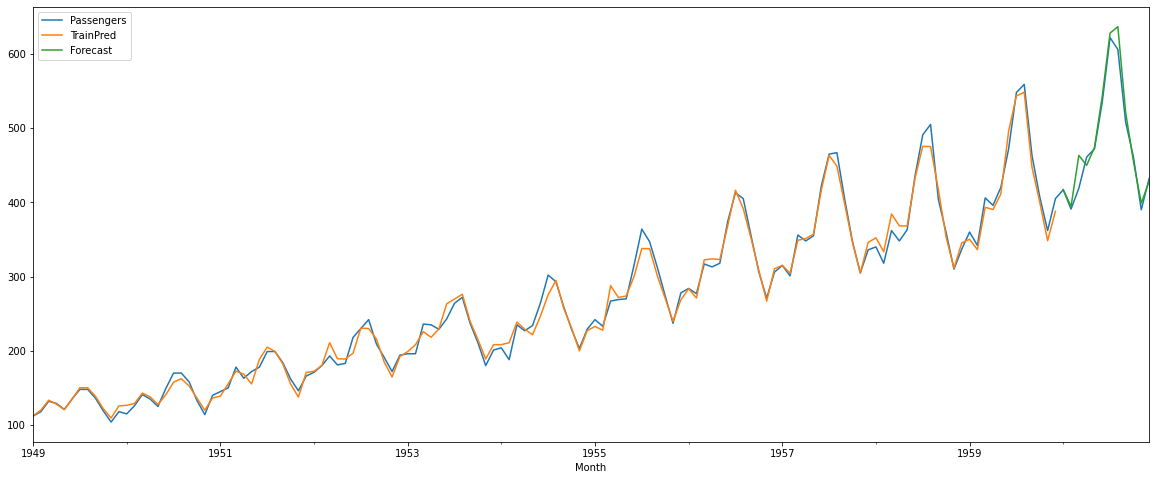

In [ ]:
df[['Passengers', 'TrainPred', 'Forecast']].plot(figsize=(20, 8));